### Bibliothéque : 

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import chardet

### Analyse profonde : 

In [88]:
with open('accidentologie.csv', 'rb') as f:
    result = chardet.detect(f.read())
encoding_detected = result['encoding']
encoding_detected 

'UTF-8-SIG'

In [69]:
data = pd.read_csv("accidentologie.csv",sep=";",encoding=encoding_detected)

In [70]:
data.columns

Index(['Statut', 'Année du compteur', 'Clé interne pour prolongation', 'Mat.',
       'Agent', 'Sexe', 'Date de naissance', 'Age', 'Grade', 'Cat.', 'Classe',
       'Entrée collectivité', 'Service', 'CIS', 'Date de l'accident *',
       'Heure de l'accident *', 'Accident de circulation',
       'Nature de l'accident', 'Moment de l'accident', 'Lieu de l'accident',
       'SSSM *', 'Enquête HS *', 'Elément matériel *', 'Type de sport ',
       'Facteur potentiel *', 'Circonstances de l'accident', 'Motif',
       'Date certificat', 'Date début initial', 'Date fin initial',
       'Durée initial (j)', 'Date début prol', 'Date fin prol', 'Durée prol',
       'Durée totale arrêt', 'Nature lésion', 'Siège lésion',
       'Latéralité de la blessure'],
      dtype='object')

In [71]:
data.columns = data.columns.str.replace('*', '', regex=False).str.strip()

In [72]:
data.drop(columns=["Agent"],inplace=True)

In [73]:
data["Date de l'accident"] = pd.to_datetime(data["Date de l'accident"],errors='coerce', dayfirst=True)

data["Année"] = data["Date de l'accident"].dt.year
data["Mois"] = data["Date de l'accident"].dt.month
data["Jour"] = data["Date de l'accident"].dt.day
data["Jour_semaine"] = data["Date de l'accident"].dt.day_name()

In [74]:
data["Jour_semaine"].unique()

array(['Sunday', 'Wednesday', 'Saturday', 'Friday', 'Thursday', 'Monday',
       'Tuesday'], dtype=object)

In [75]:
# Nettoyer la durée d'arret 
data["Durée totale arrêt"] = pd.to_numeric(data["Durée totale arrêt"],errors='coerce')

### Analyse et visualisation : 

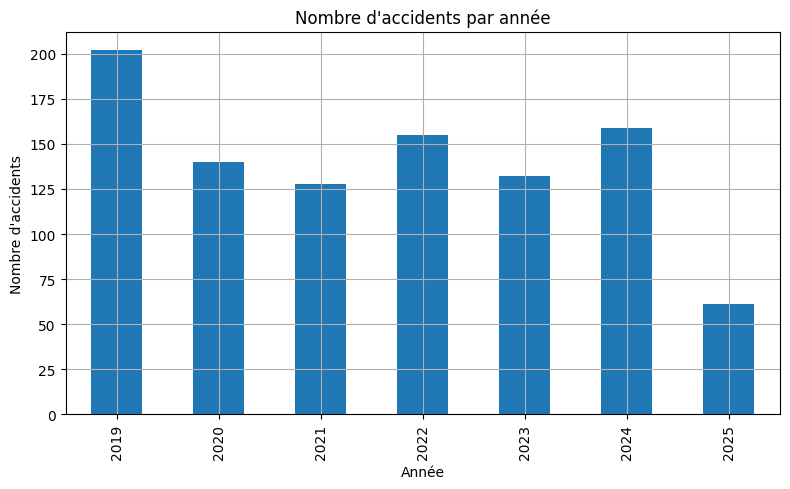

In [76]:
# --- A. Accidents par année ---
plt.figure(figsize=(8, 5))
data['Année'].value_counts().sort_index().plot(kind='bar')
plt.title("Nombre d'accidents par année")
plt.xlabel("Année")
plt.ylabel("Nombre d'accidents")
plt.grid(True)
plt.tight_layout()
plt.show()

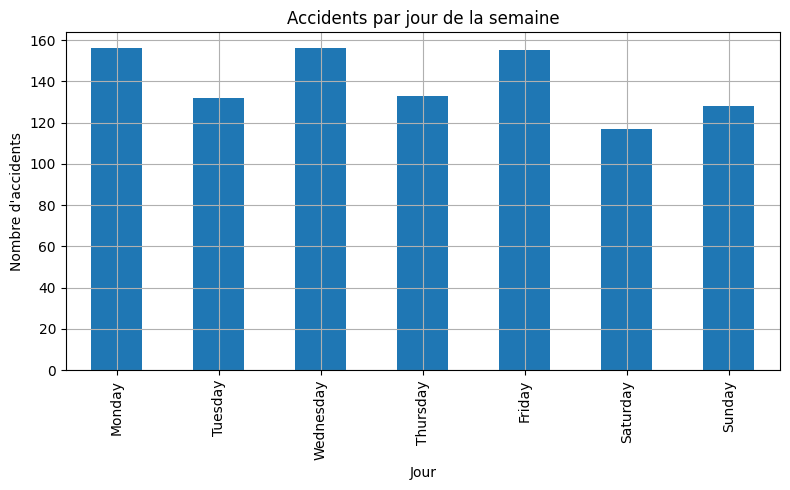

In [77]:
# --- B. Accidents par jour de la semaine ---
jours = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
data['Jour_semaine'] = pd.Categorical(data['Jour_semaine'], categories=jours, ordered=True)

plt.figure(figsize=(8, 5))
data['Jour_semaine'].value_counts().sort_index().plot(kind='bar')
plt.title("Accidents par jour de la semaine")
plt.xlabel("Jour")
plt.ylabel("Nombre d'accidents")
plt.grid(True)
plt.tight_layout()
plt.show()

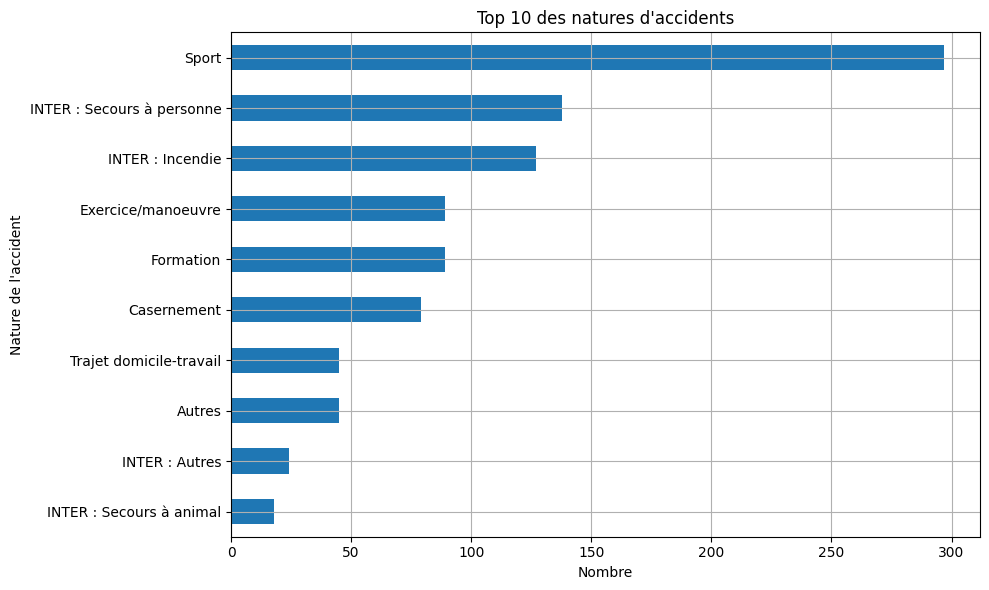

In [78]:
# --- C. Nature des accidents ---
plt.figure(figsize=(10, 6))
data["Nature de l'accident"].value_counts().head(10).plot(kind='barh')
plt.title("Top 10 des natures d'accidents")
plt.xlabel("Nombre")
plt.gca().invert_yaxis()
plt.grid(True)
plt.tight_layout()
plt.show()

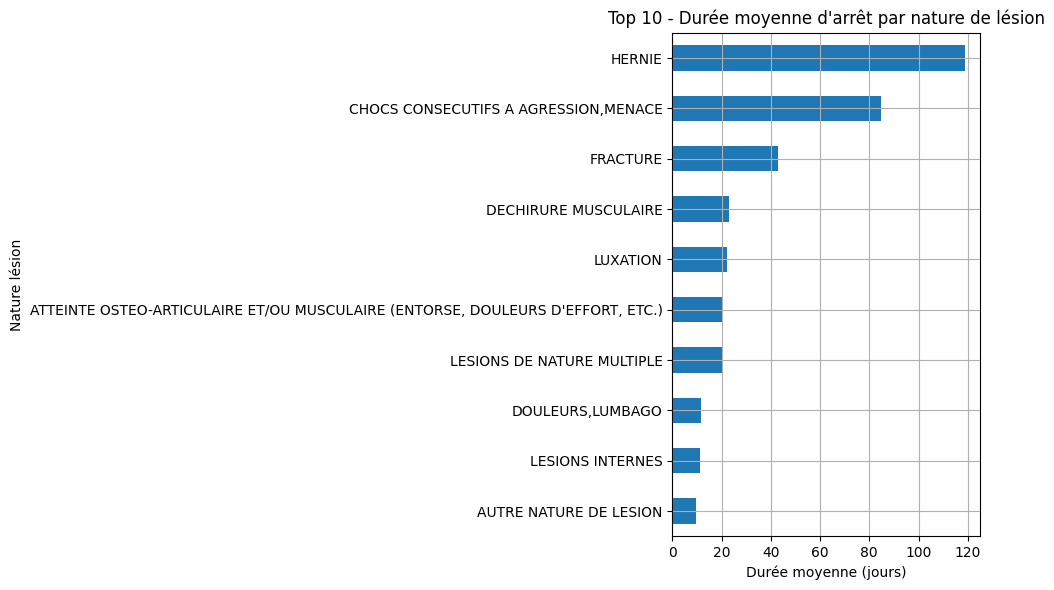

In [79]:
# --- D. Durée moyenne d'arrêt par nature de lésion ---
plt.figure(figsize=(10, 6))
data.groupby('Nature lésion')['Durée totale arrêt'].mean().dropna().sort_values(ascending=False).head(10).plot(kind='barh')
plt.title("Top 10 - Durée moyenne d'arrêt par nature de lésion")
plt.xlabel("Durée moyenne (jours)")
plt.gca().invert_yaxis()
plt.grid(True)
plt.tight_layout()
plt.show()

In [82]:
from datetime import datetime

# Conversion de la date de naissance
data['Date de naissance'] = pd.to_datetime(data['Date de naissance'], errors='coerce', dayfirst=True)

# Calcul de l'âge manuellement
aujourd_hui = pd.Timestamp('today')
data['Age_calculé'] = (aujourd_hui - data['Date de naissance']).dt.days // 365


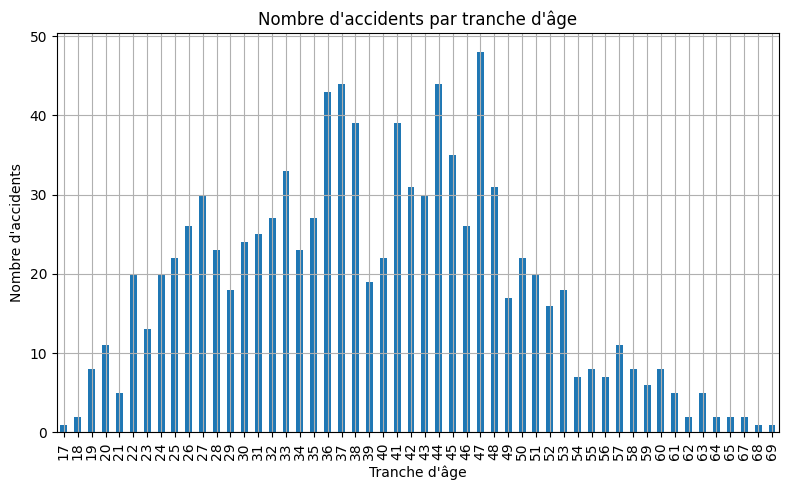

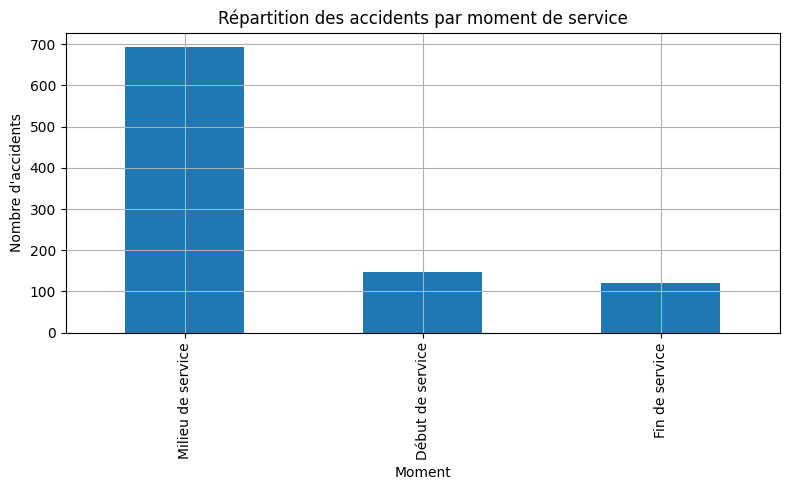

In [84]:
# --- 2. Répartition par tranche d'âge ---
age_distribution = data['Age_calculé'].value_counts().sort_index()

plt.figure(figsize=(8, 5))
age_distribution.plot(kind='bar')
plt.title("Nombre d'accidents par tranche d'âge")
plt.xlabel("Tranche d'âge")
plt.ylabel("Nombre d'accidents")
plt.grid(True)
plt.tight_layout()
plt.show()

# --- 3. Répartition selon le moment de l'accident ---
moment_distribution = data["Moment de l'accident"].value_counts()

plt.figure(figsize=(8, 5))
moment_distribution.plot(kind='bar')
plt.title("Répartition des accidents par moment de service")
plt.xlabel("Moment")
plt.ylabel("Nombre d'accidents")
plt.grid(True)
plt.tight_layout()
plt.show()




In [ ]:


# --- 1. Création de la variable binaire : arrêt long (> 30 jours) ---
data['Arret_long'] = data['Durée totale arrêt'] > 30

# --- 2. Tranche d'âge (si pas encore créée) ---
bins = [0, 20, 30, 40, 50, 60, 100]
labels = ['<20', '20-29', '30-39', '40-49', '50-59', '60+']
data['Tranche_Age'] = pd.cut(data['Age'], bins=bins, labels=labels, right=False)

# --- 3. Fonction d'analyse du taux d'arrêt long par catégorie ---
def taux_par_colonne(data, colonne):
    return data.groupby(colonne)['Arret_long'].agg(
        Taux=lambda x: round(100 * x.mean(), 1),
        Total='count'
    ).sort_values(by='Taux', ascending=False)

# --- 4. Calculs des taux ---
taux_nature = taux_par_colonne(data, "Nature de l'accident")
taux_sexe = taux_par_colonne(data, "Sexe")
taux_grade = taux_par_colonne(data, "Grade")
taux_age = taux_par_colonne(data, "Tranche_Age")

# --- 5. Affichage interactif ---
from IPython.display import display

display(taux_nature)
display(taux_sexe)
display(taux_grade)
display(taux_age)



/var/folders/vt/013ql73x5xl8csv56jf7ym9c0000gn/T/ipykernel_12954/682065907.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return data.groupby(colonne)['Arret_long'].agg(


,Taux,Total
Nature de l'accident,,
Trajet en intervention,25.0,4
INTER : Autres,20.8,24
Trajet domicile-travail,17.8,45
Sport,17.2,297
Tâche technico-administrative,12.5,8
Exercice/manoeuvre,12.4,89
Formation,12.4,89
INTER : Incendie,9.4,127
Casernement,7.6,79


,Taux,Total
Sexe,,
M,12.3,836
F,9.2,141


,Taux,Total
Grade,,
Sapeur 2e classe,27.3,11
Infirmier Principal,25.0,4
Infirmier en chef,25.0,4
Lieutenant,25.0,8
Adjudant-chef,15.7,197
Capitaine,15.4,13
Adjudant,13.0,46
Sergent,11.8,102
Caporal-chef,11.5,182


,Taux,Total
Tranche_Age,,
60+,21.4,28
50-59,15.7,121
40-49,13.0,324
30-39,11.8,305
20-29,6.9,188
<20,0.0,11
